# Quantum Fourier Transform Cross-Verification

<u>NOTE</u>: Remeber to try to hit **Restart** if something is wrong and then **Run All** again.

## Introduction
This module run experiments of QFT algorithm on different Quantum Computing platform and compare the correctness of each random input configuration to each quantum computing platform. 

Each module based on a specific quantum computing platform must implement a function such that it takes parameters:
-   A number of qubits used.
-   A random configuration of a bitstring of 0's and 1's input state.
-   A number of shots for each configuration run.

And returns:
-   A map of counts of each measurement outcome correspond to a configuration input state.

Optional: Print the circuit out in the function

This module will then demonstrate the statistic of each experiment on different type of quantum computers

## Set up


In [1]:
import random
import matplotlib.pyplot as plt
from Trapped_Ion.qft_trapped_ion import *
from Photon_Implementation.qft_photonic import *
from Superconducting.qft_super_conducting import *

# Import package of ie. qft_super_conducting.py, qft_photonic.py, qft_neutral_atom.py here


/home/ugrads/majors/ttv27042004/CS4134/.venv/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


## Histogram printing function

In [2]:
def printHistogramCounts(dataset: dict, title: str):
    
    # Extract x and y
    labels = sorted(list(dataset.keys()))  
    values = [dataset[b] for b in labels]

    # Plot
    plt.figure(figsize=(6,4))
    plt.bar(labels, values)
    plt.xlabel("Bitstring |x>")
    plt.ylabel("Counts")
    plt.title(title)
    plt.xticks(rotation=75)  # rotate if needed
    plt.show()

In [3]:
def plot_multi_histogram(result_list, device_names, title="Cross-Platform Comparison"):
    """
    result_list: list of dicts (e.g., [result_ionq, result_ibm, result_photonic])
    device_names: list of strings of same length as result_list
    """

    # Collect all possible bitstrings
    all_labels = sorted(set().union(*[res.keys() for res in result_list]))

    # Number of devices
    m = len(result_list)
    x = np.arange(len(all_labels))  # base x locations

    bar_width = 0.8 / m  # spacing between groups

    plt.figure(figsize=(10, 5))

    for i, res in enumerate(result_list):
        # Align counts for missing keys (put 0)
        values = [res.get(bit, 0) for bit in all_labels]

        plt.bar(
            x + i * bar_width,
            values,
            width=bar_width,
            label=device_names[i]
        )

    plt.xticks(x + bar_width * (m-1)/2, all_labels, rotation=60)
    plt.ylabel("Counts")
    plt.xlabel("Bitstring |x⟩")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 3-Qubit Experiment on Ideal Simulator

The configuration is [0, 0, 0]
{'000': 139, '001': 136, '010': 127, '011': 139, '100': 129, '101': 112, '110': 122, '111': 120}
{'000': 156, '001': 129, '010': 119, '011': 130, '100': 127, '101': 124, '110': 127, '111': 112}
{'000': 126, '001': 131, '010': 121, '011': 132, '100': 115, '101': 159, '110': 114, '111': 126}


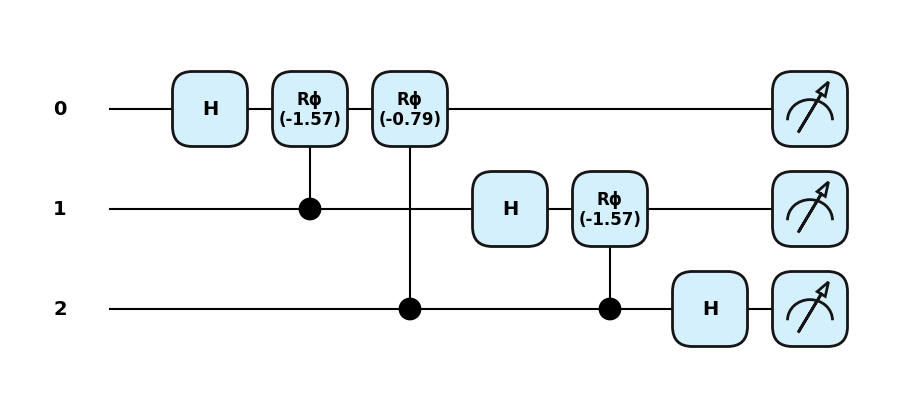

In [4]:
n = 3
config = [0] * n
shots = 1024

print(f"The configuration is {config}")

result_trapped_ion = qft_trapped_ion(n, config, shots)
result_photonic = qft_photonic(n, config, shots)
result_super_conducting = qft_super_conducting(n, config, shots)

print(result_trapped_ion)
print(result_photonic)
print(result_super_conducting)

# printHistogramCounts(result_trapped_ion, "QFT Result Distribution (IonQ Trapped-ion)")
# printHistogramCounts(result_photonic, "QFT Result Distribution (Perceval Photonic)")
# printHistogramCounts(result_super_conducting, "QFT Result Distribution (Super Conducting)")


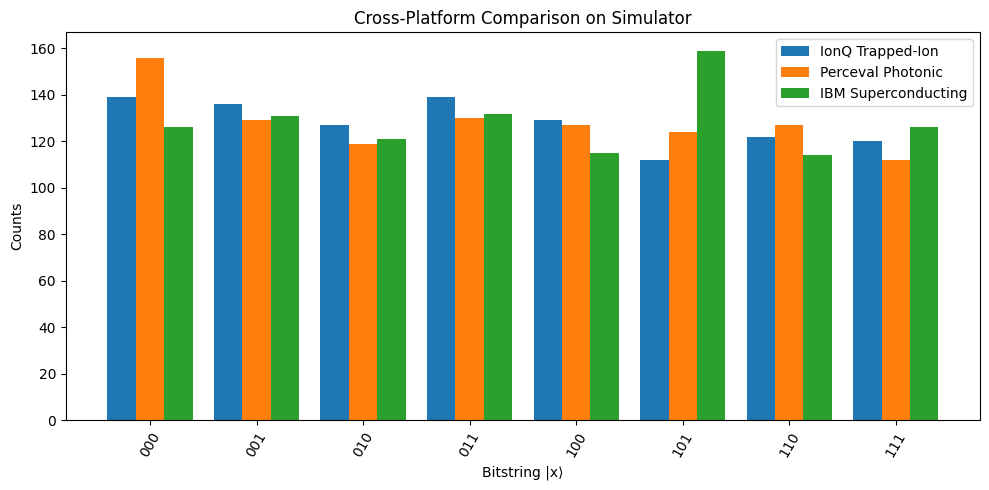

In [ ]:
plot_multi_histogram([result_trapped_ion, result_photonic, result_super_conducting], ["IonQ Trapped-Ion", "Perceval Photonic", "IBM Superconducting"], "Cross-Platform Comparison on Simulator (3 qubits, 1024 shots)")

## 5-Qubit Experiment on Ideal Simulator

The configuration is [0, 0, 0, 0, 0]


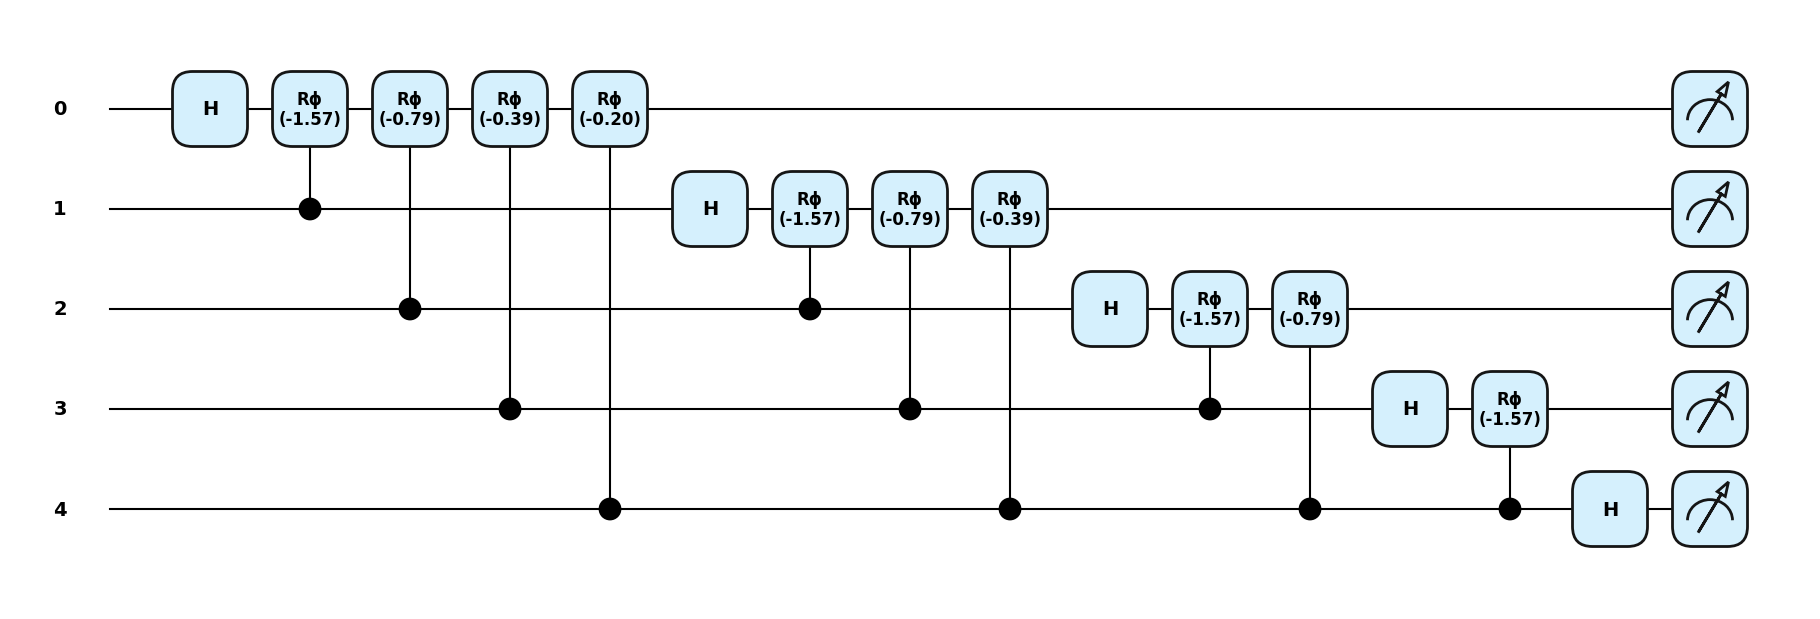

In [6]:
n = 5
config = [0] * n
shots = 1024

print(f"The configuration is {config}")

result_trapped_ion = qft_trapped_ion(n, config, shots)
result_photonic = qft_photonic(n, config, shots)
result_super_conducting = qft_super_conducting(n, config, shots)

In [7]:
# printHistogramCounts(result_trapped_ion, "IonQ Trapped-ion")
# printHistogramCounts(result_photonic, "Perceval Photonic")
# printHistogramCounts(result_super_conducting, "Super Conducting")


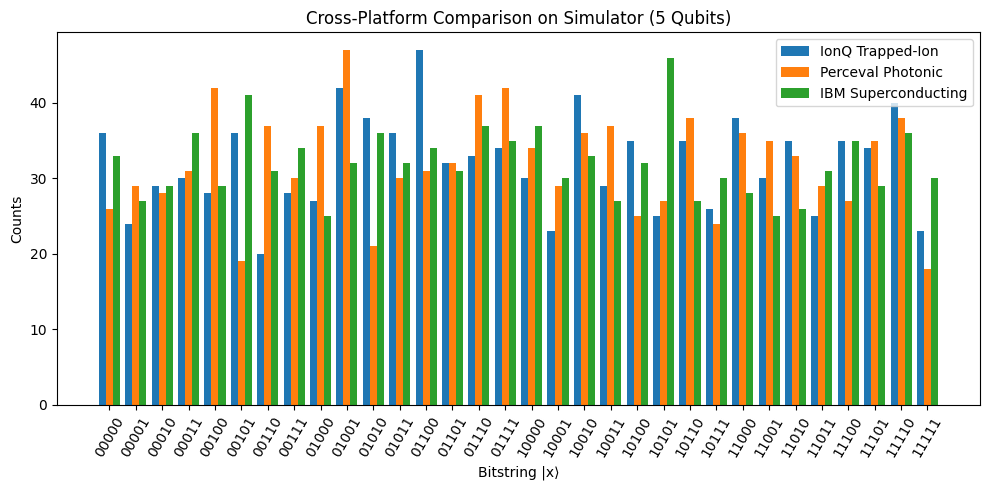

In [ ]:
plot_multi_histogram([result_trapped_ion, result_photonic, result_super_conducting], ["IonQ Trapped-Ion", "Perceval Photonic", "IBM Superconducting"], "Cross-Platform Comparison on Simulator (5 qubits, 1024 shots)")

## 3-Qubit Experiment on Noisy Model

In [9]:
n = 3
config = [0] * n
shots = 1024

print(f"The configuration is {config}")

result_trapped_ion = qft_trapped_ion_noisy(n, config, shots)
result_photonic = qft_photonic_noisy(n, config, shots)
# result_super_conducting = qft_super_conducting(n, config, shots)

print(result_trapped_ion)
print(result_photonic)
# print(result_super_conducting)

The configuration is [0, 0, 0]
{'000': 117, '001': 119, '010': 143, '011': 139, '100': 120, '101': 133, '110': 121, '111': 132}
{'000': 129, '001': 132, '010': 122, '011': 115, '100': 133, '101': 122, '110': 131, '111': 140}


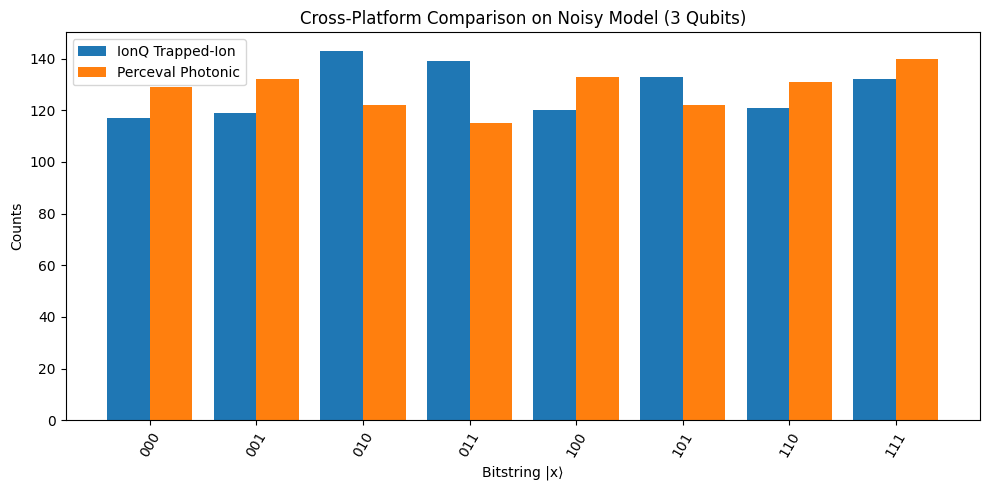

In [ ]:
plot_multi_histogram([result_trapped_ion, result_photonic], ["IonQ Trapped-Ion", "Perceval Photonic"], "Cross-Platform Comparison on Noisy Model (3 qubits, 1024 shots)")

## 4-Qubit Experiment on Noisy Model

__Note__: Since Perceval platform only allow up to 24 qumodes (in the middel between 4 to 5 qubits), we cannot run the experiment with 5 qubits.

In [11]:
n = 4
config = [0] * n
shots = 1024

print(f"The configuration is {config}")

result_trapped_ion = qft_trapped_ion_noisy(n, config, shots)
result_photonic = qft_photonic_noisy(n, config, shots)
# result_super_conducting = qft_super_conducting(n, config, shots)

print(result_trapped_ion)
print(result_photonic)
# print(result_super_conducting)

The configuration is [0, 0, 0, 0]
{'0000': 56, '0001': 72, '0010': 64, '0011': 78, '0100': 71, '0101': 63, '0110': 56, '0111': 57, '1000': 67, '1001': 78, '1010': 65, '1011': 57, '1100': 61, '1101': 42, '1110': 65, '1111': 72}
{'0000': 63, '0001': 66, '0010': 59, '0011': 75, '0100': 64, '0101': 54, '0110': 59, '0111': 60, '1000': 62, '1001': 69, '1010': 67, '1011': 70, '1100': 66, '1101': 67, '1110': 54, '1111': 69}


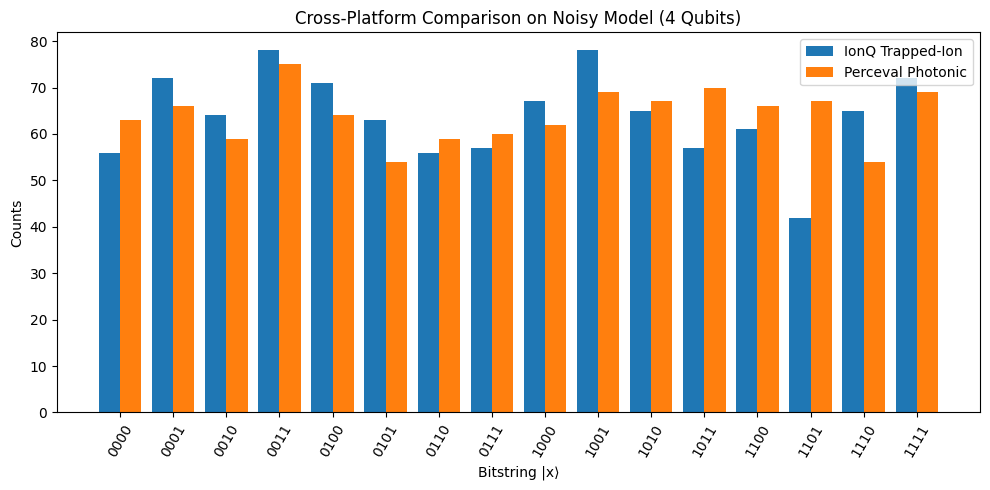

In [ ]:
plot_multi_histogram([result_trapped_ion, result_photonic], ["IonQ Trapped-Ion", "Perceval Photonic"], "Cross-Platform Comparison on Noisy Model (4 qubits, 1024 shots)")